# Thyroid Data Analysis

## Imports

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score

from imblearn.over_sampling import SMOTE

## Loading the data

In [13]:
data=pd.read_csv("../data/thyroid.csv")

In [14]:
data.sample(10)

,T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
214,114,11.1,2.4,2.0,-0.3,negative
65,134,1.9,0.6,18.4,8.2,negative
32,119,11.4,2.3,2.2,1.6,negative
43,103,5.1,1.4,1.2,5.0,negative
116,109,9.7,1.4,1.1,2.1,negative
188,109,7.6,1.3,2.2,1.9,negative
11,112,5.9,1.7,2.0,1.3,negative
67,98,5.7,0.4,1.3,2.8,negative
173,100,9.5,2.5,1.3,-0.2,negative
20,113,9.0,2.0,1.8,1.6,negative


In [38]:
data["Class"] = data["Class"].map({"positive": 1, "negative": 0})

In [39]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
T3resin,215.0,109.595349,13.145447,65.0,103.00,110.0,117.5,144.0
Thyroxin,215.0,9.804651,4.697362,0.5,7.10,9.2,11.3,25.3
Triiodothyronine,215.0,2.050233,1.419486,0.2,1.35,1.7,2.2,10.0
Thyroidstimulating,215.0,2.880000,6.118031,0.1,1.00,1.3,1.7,56.4
TSH_value,215.0,4.199070,8.070519,-0.7,0.55,2.0,4.1,56.3
Class,215.0,0.162791,0.370036,0.0,0.00,0.0,0.0,1.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
T3resin               215 non-null int64
Thyroxin              215 non-null float64
Triiodothyronine      215 non-null float64
Thyroidstimulating    215 non-null float64
TSH_value             215 non-null float64
Class                 215 non-null int64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


## Exploratory Data Analysis

### Nullity Analysis

In [41]:
data.isna().sum()

T3resin               0
Thyroxin              0
Triiodothyronine      0
Thyroidstimulating    0
TSH_value             0
Class                 0
dtype: int64

### Check the class balance

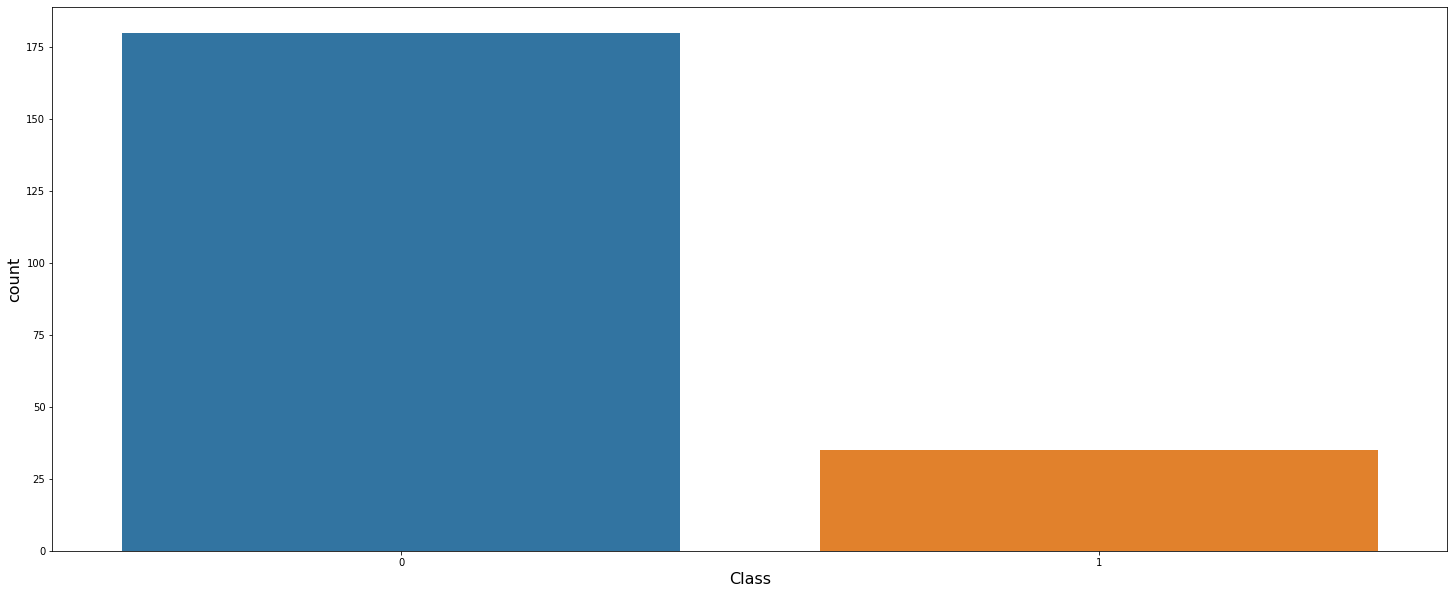

In [42]:
sns.countplot(data['Class']);

There is a clear disparity here, as there are far more negatives than positives in our dataset.

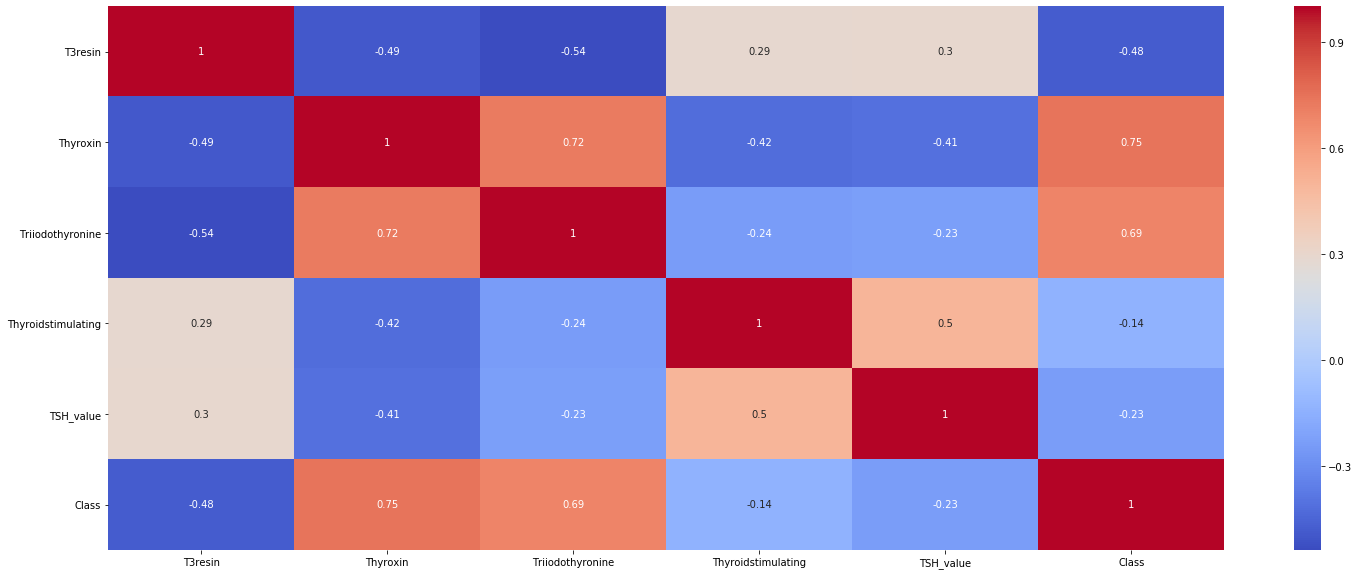

In [49]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm");

High correlation variables: 
- `Thyroxin` and `Triiodothyronine`
- `Thyroxin` and `Class`
- `Triiodothyronine` and `Class`

# SMOTE

In [43]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [46]:
X = data.drop(["Class"], axis=1)
y = data["Class"]

In [48]:
sm_X, sm_y = sm.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(sm_X, sm_y)

## Model Selection

In [52]:
models = {'Logistic Regression': LogisticRegression, 
          'KNN': KNeighborsClassifier, 
          'Linear Discriminant Analysis': LinearDiscriminantAnalysis, 
          'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis,
          'Random Forest': RandomForestClassifier}

results = []#
for name, model in models.items():
    lst = []
    lst.append(name)
    
    m = model()
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    lst.append(score)
    
    y_pred = m.predict(X_test)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    lst.append(recall)
    lst.append(precision)
    
    results.append(lst)

results = pd.DataFrame(data=results, columns=["Model", "Accuracy", "Recall", "Precision"])
results.set_index(["Model"], inplace=True)

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
results

,Accuracy,Recall,Precision
Model,,,
Logistic Regression,1.000000,1.000000,1.000000
KNN,0.966667,0.934783,1.000000
Linear Discriminant Analysis,0.977778,1.000000,0.953488
Quadratic Discriminant Analysis,0.955556,0.914894,1.000000
Random Forest,1.000000,1.000000,1.000000
